Menambahkan Library yang diperlukan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Muat dataset langsung secara daring

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/economics.csv'
economics = pd.read_csv(url, header=None)
economics

,0,1,2,3,4,5
0,date,pce,pop,psavert,uempmed,unemploy
1,1967-07-01,506.7,198712,12.6,4.5,2944
2,1967-08-01,509.8,198911,12.6,4.7,2945
3,1967-09-01,515.6,199113,11.9,4.6,2958
4,1967-10-01,512.2,199311,12.9,4.9,3143
...,...,...,...,...,...,...
570,2014-12-01,12062,319746.157,7.6,12.9,8717
571,2015-01-01,12046,319928.646,7.7,13.2,8903
572,2015-02-01,12082.4,320074.511,7.9,12.9,8610
573,2015-03-01,12158.3,320230.786,7.4,12,8504


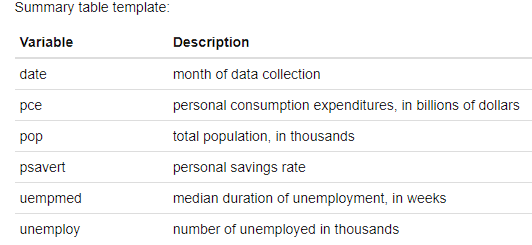

Metadata untuk tabel pertumbuhan ekonomi Amerika Serikat

Mencari tahu jenis tipe data menggunakan fungsi df.info()

In [ ]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       575 non-null    object
 1   1       575 non-null    object
 2   2       575 non-null    object
 3   3       575 non-null    object
 4   4       575 non-null    object
 5   5       575 non-null    object
dtypes: object(6)
memory usage: 27.1+ KB


Terlihat dataset tersebut semua dalam tipe 'Object'. Cukup aneh. Jika diperhatikan baik-baik indeks kolom tidak dalam bentuk yang benar. Memperbaiki indeks kolom menggunakan fungsi dari Pandas.

In [ ]:
economics.set_axis(['date', 'pce', 'pop', 'psavert', 
                    'uempmed', 'unemploy'], axis='columns', inplace=True)
economics = economics.iloc[1: , :]

Cek ulang data

In [ ]:
economics

,date,pce,pop,psavert,uempmed,unemploy
1,1967-07-01,506.7,198712,12.6,4.5,2944
2,1967-08-01,509.8,198911,12.6,4.7,2945
3,1967-09-01,515.6,199113,11.9,4.6,2958
4,1967-10-01,512.2,199311,12.9,4.9,3143
5,1967-11-01,517.4,199498,12.8,4.7,3066
...,...,...,...,...,...,...
570,2014-12-01,12062,319746.157,7.6,12.9,8717
571,2015-01-01,12046,319928.646,7.7,13.2,8903
572,2015-02-01,12082.4,320074.511,7.9,12.9,8610
573,2015-03-01,12158.3,320230.786,7.4,12,8504


Cek kembali jenis tipe data tersebut di setiap kolom.

In [ ]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 1 to 574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      574 non-null    object
 1   pce       574 non-null    object
 2   pop       574 non-null    object
 3   psavert   574 non-null    object
 4   uempmed   574 non-null    object
 5   unemploy  574 non-null    object
dtypes: object(6)
memory usage: 27.0+ KB


Jenis data yang kurang tepat dapat menyebabkan kesalahan dan menyulitkan dalam proses preprocessing data. Oleh karena itu, perlu setiap jenis data dirubah tipenya sesuai dengan hasil atau nilai yang ada.
Tipe data dapat diubah dengan menggunakan method astype yang tersedia pada library Pandas.

In [ ]:
economics['date'] = economics['date'].astype('datetime64')
economics['pce'] = economics['pce'].astype('float64')
economics['pop'] = economics['pop'].astype('float64')
economics['psavert'] = economics ['psavert'].astype('float64')
economics['uempmed'] = economics ['uempmed'].astype('float64')
economics['unemploy'] = economics ['unemploy'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Mengubah index baris agar lebih enak dipandang menggunakan set_index method. Tambahkan argumen inplace='True' dengan tujuan agar perubahan tersebut diterapkan pada dataframe (override data).

In [ ]:
economics.set_index('date', inplace=True)

Lakukan perhitungan analisis statistika sederhana menggunakan fungsi describe()

In [ ]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


Terlihat dari hasil, nilai terendah tidak menampilkan angka 0 sehingga tidak adanya data yang hilang.
Menampilkan dataframe economics kembali dengan tujuan melihat hasil akhir perubahan tersebut.

In [ ]:
economics

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,506.7,198712.000,12.6,4.5,2944
1967-08-01,509.8,198911.000,12.6,4.7,2945
1967-09-01,515.6,199113.000,11.9,4.6,2958
1967-10-01,512.2,199311.000,12.9,4.9,3143
1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...
2014-12-01,12062.0,319746.157,7.6,12.9,8717
2015-01-01,12046.0,319928.646,7.7,13.2,8903
2015-02-01,12082.4,320074.511,7.9,12.9,8610


Salah satu hal yang perlu dilakukan sebelum melakukan pemodelan ialah dengan menghitung korelasi matriks dengan tujuan mengetahui korelasi variabel-variabel tersebut. Hal ini dapat dilakukan dengan menggunakan library matplotlib dan library seaborn.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

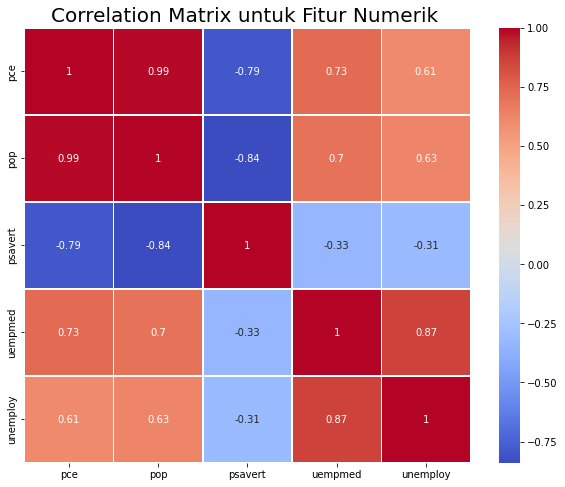

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = economics.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Hasil matriks tersebut mendeskripsikan bahwa terdapat korelasi lemah antara variabel psavert dengan variabel target, yaitu ‘unemploy’ serta memiliki korelasi cukup tinggi dengan uempmed, pop dan pce (<0.5). Sehingga, dapat diabaikan.
Nilai-nilai numerik tersebut dapat dijabarkan dalam bentuk histogram agar membantu dalam pembacaan data.

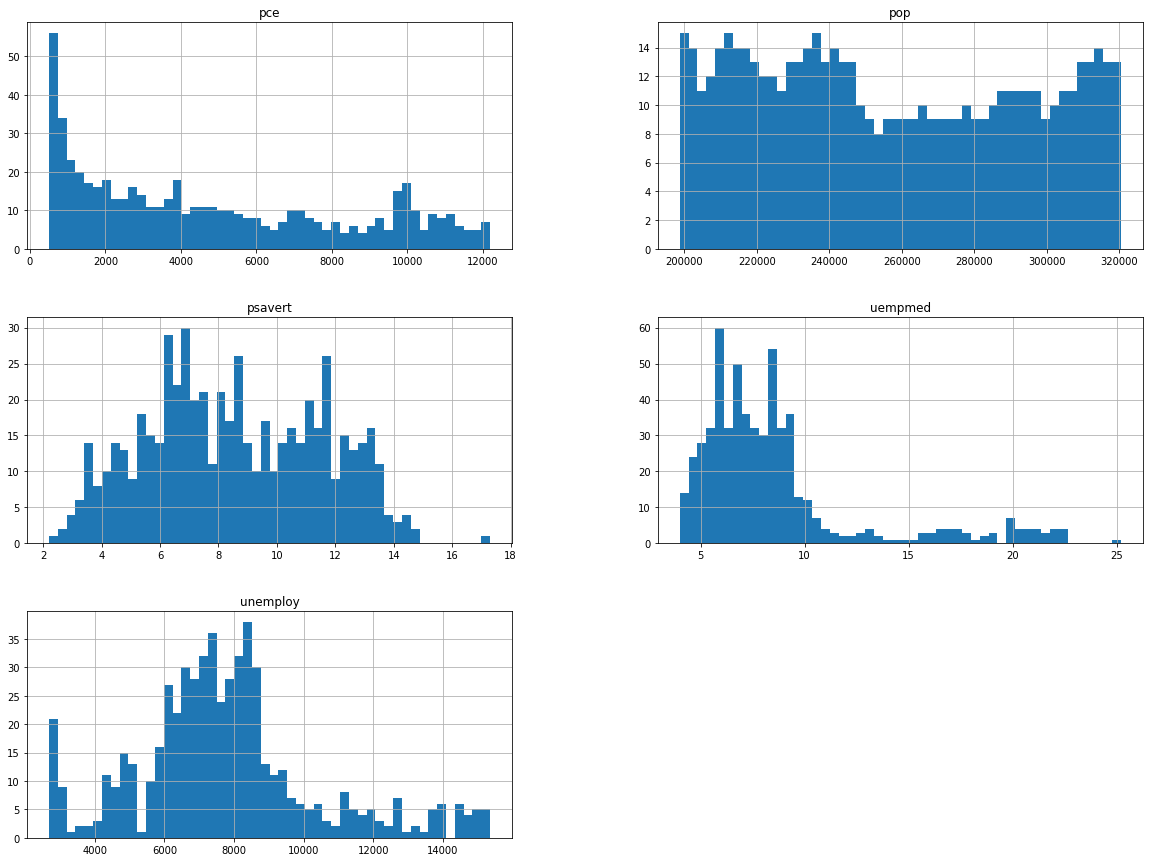

In [ ]:
economics.hist(bins=50, figsize=(20,15))
plt.show()

Gunakan fungsi drop untuk menghapus kolom.

In [ ]:
economics.drop(['psavert'], inplace=True, axis=1)
economics.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pce,pop,uempmed,unemploy
date,,,,
1967-07-01,506.7,198712.0,4.5,2944
1967-08-01,509.8,198911.0,4.7,2945
1967-09-01,515.6,199113.0,4.6,2958
1967-10-01,512.2,199311.0,4.9,3143
1967-11-01,517.4,199498.0,4.7,3066


Preprocessing kemudian dilakukan dengan tujuan agar pembuatan model machine learning dapat dilakukan dengan mudah dan tanpa hambatan. Preprocessing mencakup pembagian data test dan training (perbandingan 90:10, dengan nilai random state fixed tujuan agar memiliki value yang sama baik di bagian train maupun test.

In [ ]:
from sklearn.model_selection import train_test_split
 
X = economics.drop(["unemploy"],axis =1)
y = economics["unemploy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Melakukan proses pengecekan dengan tujuan memastikan jumlah data yang terbagi.

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 574
Total # of sample in train dataset: 516
Total # of sample in test dataset: 58


Standarisasi perlu dilakukan agar menghindari kebocoran data selama proses training (pelatihan). Standarisasi dapat dilakukan dengan mudah dengan mengimpor fungsi StandardScaler. Lakukan terlebih dahulu untuk training data.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['uempmed', 'pop']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,uempmed,pop
date,,
1968-06-01,-1.017099,-1.541241
1998-11-01,-0.488407,0.558922
1984-04-01,-0.103903,-0.575108
1980-07-01,-0.392281,-0.797135
1968-08-01,-1.065162,-1.531335


Melakukan pengecekan untuk memastikan standarisasi dilakukan dengan tepat.

In [ ]:
X_train[numerical_features].describe().round(4)

,uempmed,pop
count,516.0000,516.0000
mean,0.0000,-0.0000
std,1.0010,1.0010
min,-1.1132,-1.5912
25%,-0.6326,-0.8831
50%,-0.2721,-0.1075
75%,0.1364,0.8953
max,3.9814,1.7344


Mempersiapkan dataframe baru untuk proses pelatihan model-model yang akan digunakan, terdiri dari 'K-Nearest Neighborhood, Random Forest, Boosting Algorithm (Seperti yang dijelaskan dalam dokumen)

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Perlu diketahui, dalam metode K-Nearest Neighborhood terdapat beberapa metriks yang dapat digunakan. Salah satunya ialah metrik euclidean yang digunakan untuk pembuatan model ini, dalam prosesnya model hanya menggunakan  k = 8 tetangga.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Kemudian algoritma selanjutnya yang akan digunakan adalah algoritma random forest. Dalam prosesnya, Anda melakukan impor dengan bantuan sklearn library dengan menggunakan fungi RandomForestRegressor Anda dapat mengubah hyperparameter sesuai dengan yang Anda inginkan.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

Kemudian algoritma selanjutnya yang akan digunakan adalah algoritma boosting. Dalam prosesnya, Anda melakukan impor dengan bantuan sklearn library dengan method ensemble dengan membuat instantiate menggunakan fungi AdaBoostRegressor Anda dapat mengubah hyperparameter sesuai dengan yang Anda inginkan. Hyperprameter tersebut terdiri dari learning_rate serta random_state. 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan standar deviasi=1

In [ ]:

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Kemudian evaluasi model dilakukan dengan menggunakan algoritma mean squared error dengan membuat dataframe baru ditambahkan dengan kolom test dan train serta dictionary untuk setiap algoritma yang digunakan. Kemudian di akhir menghitung mse menggunakan for loop untuk train dan test data. Setelah itu, lakukan pemanggilan variabel mse.

In [ ]:

mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 

mse

,train,test
KNN,650.145697,1789.24086
RF,12.033314,61.324142
Boosting,631.180607,973.253754


Hasil performansi dari ketiga algoritma yang dipilih tersebut menunjukkan perbedaan yang cukup terlihat bagi model. Performansi menunjukkan bahwa algoritma random forest memiliki nilai mse yang lebih kecil dibandingkan dengan kedua model lainnya. Lakukan plotting terhadap performa menggunakan library matplotlib.

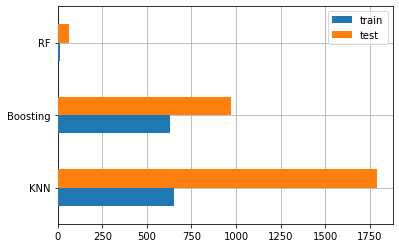

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Lakukan perhitungan prediksi model untuk mengetahui tingkat akurasi dari prediksi yang dilakukan oleh model dengan hasil aktual.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
date,,,,
1994-12-01,7230,7561.1,7359.8,8035.3


Hasil dari performa tersebut menunjukkan bahwa algoritma Random Forest menjadi algoritma paling sesuai untuk masalah tersebut. Setiap performa model tergantung dari kondisi permasalahan dan tentunya tersedianya data yang tentunya berbeda-beda, sehingga hal ini tergantung dari banyak kasus.